In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
def read_data(file_paths):
    """
    Read data from multiple files and concatenate durations.
    
    Args:
        file_paths: List of file paths to read data from
        
    Returns:
        durations: Concatenated array of duration values
    """
    all_durations = []
    
    for file_path in file_paths:
        data = pd.read_csv(file_path, sep='\t', header=None, names=['timestamps', 'durations'])
        all_durations.append(data['durations'].values)
    
    return np.concatenate(all_durations)

def FreedmanDiaconis_bins(data):
    # Compute IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Freedman–Diaconis bin width
    n = len(data)
    bin_width = 2 * IQR / (n ** (1/3))

    # Number of bins
    num_bins = int((data.max() - data.min()) / bin_width)
    num_bins = max(num_bins, 1)  # ensure at least 1 bin

    print(f"Computed bin width: {bin_width:.3f}")
    print(f"Number of bins: {num_bins}")

    return num_bins

Computed bin width: 0.010
Number of bins: 263
(69532,)


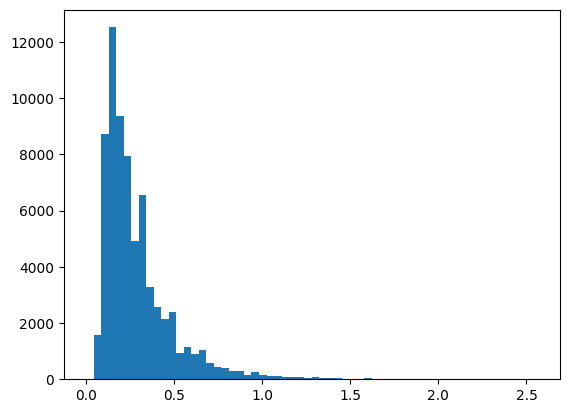

In [54]:
file_paths = ['/Users/adampearl/Documents/191/Muon Experiment/muon_mass_calibration1_3_11_25/MassCalibration_data.txt','/Users/adampearl/Documents/191/Muon Experiment/muon_mass_calibration2_3_11_25/MassCalibration_data.txt', '/Users/adampearl/Documents/191/Muon Experiment/muon_mass_calibration3_3_11_25/MassCalibration_data.txt']
raw_data = read_data(file_paths)
# Create a mask that is True where data is not NaN
mask = ~np.isnan(raw_data)

# Use the mask to filter out NaNs
data = raw_data[mask]
num_bins = FreedmanDiaconis_bins(data)
print(np.shape(data))

plt.hist(data,bins = 60)
plt.show()

In [25]:
if np.isnan(data).any():
    print("There is at least one NaN value in the data.")

There is at least one NaN value in the data.
